<h1 align = 'center'>Shuffling Cards</h1>

Welcome, to the first entry of this blog. Thanks for coming! In this entry we will study what happens when we shuffle cards. We will of course make this more precise as we go, but the idea is very simple, and surprisingly (to me at least) generates some highly non-trivial results. No better way to get things going than to load some packages that will be used throughout this adventure!

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({
    'font.size': 22,
    'figure.figsize': (11,7),
    'text.usetex': True,
    'grid.linestyle': ':'
})

# Backstory
To give a bit of background, this all started when I started playing poker with some friends a few months ago. Now I have known how to shuffle cards for quite some time, but what I learned while playing poker, is how to shuffle chips. During the action of the game, players often shuffle two stacks of chips, and I of course had to learn when we started playing. Once I had the basic skill and could do it consistently, I noticed if I started with, say, 3 blue chips in one stack, and 3 red chips in another, after a few shuffles, they returned to their initial positions.

Thats where this idea started, and the original notebook created for studying this _is_ titled `poker_chips.ipynb`. Once I got a few results and started looking more online I found that yes of course this has been studied, and people don't think of it as shuffling poker chips to no surprise. Now lets get into it!

# Shuffles
In reality, when shuffling cards, one hardly ever executes a perfect cut of the deck (half the cards in one pile, the other half in another), and then a perfect shuffle (one left, one right, one left,..., one right). So, of course, what we will study is an idealized shuffle, but of course there _are_ people who can do it (<a href = "https://www.youtube.com/watch?v=SbfJ7oTh5qA">here</a>)! In fact, in an old `Numberphile` video (<a href = "https://www.youtube.com/watch?v=Y2lXsxmBx7E">here</a>) you can see a perfect shuffle, and some more mathematics related to shuffling cards which is also very interesting.

So getting to it, there are really two types of shuffles, and "in shuffle" and an "out shuffle". An "out shuffle" keeps the outermost cards (the one on the top and bottom) in the same spot, whereas in an "in shuffle" the top card ends second from the top and the bottom ends second from the bottom.

So if we want to understand these shuffles, lets implement them!

In [3]:
def in_shuffle(deck):
    shuffled = []
    halfway = len(deck) // 2
    for i in range(len(deck)):
        if i % 2 == 0:
            shuffled.append(deck[halfway + i // 2])
        else:
            shuffled.append(deck[i // 2])
    return shuffled

I understand this could be improved if we did the shuffle _in place_, but I haven't given it much thought, and later, we will see it's not really necessary.

But the idea here is that we are given a deck of cards (implemented as a list) such as `[1,1,...,1,0,...,0,0]`, then we shuffle to obtain `[0,1,0,1,...,0,1,0,1]`.

In [4]:
def out_shuffle(deck):
    shuffled = []
    halfway = len(deck) // 2
    for i in range(len(deck)):
        if i % 2 == 0:
            shuffled.append(deck[i // 2])
        else:
            shuffled.append(deck[halfway + i // 2])
    return shuffled

Here the shuffle goes from `[1,1,...,1,0,...,0,0]` to `[1,0,1,0,...,1,0,1,0]` and you can see that `out_shuffle = reverse(in_shuffle)`!

The next thing we are going to need to do is keep these things shuffling until they come back to their initial configuration.

In [5]:
def evolve_stack(size, option = 'in'):
    if size % 2 != 0:
        raise ValueError('size of deck must be even')
    initial = [1 if i < size // 2 else 0 for i in range(size)]
    if option == 'in':
        shuffle_type = in_shuffle
    else:
        shuffle_type = out_shuffle
    shuffled = shuffle_type(initial)
    period = 1
    while shuffled != initial:
        shuffled = shuffle_type(shuffled)
        period += 1
    return period

Now we can do all sorts of tests on a small number of cards to make sure this all runs correctly, and I can assure you I have done this, but, for sake of readability, have left it out. An interesting example to run, however is with 52 cards.

In [8]:
print('in shuffle: ' + str(evolve_stack(52, 'in')))
print('out shuffle: ' + str(evolve_stack(52, 'out')))

in shuffle: 52
out shuffle: 8


Hmmmm, kind of weird how different they are. Before we delve into some math, lets run it on more than one number and see what kind of trend we find.

In [9]:
sizes = [2*n for n in range(1,2000)]
in_periods = [evolve_stack(n) for n in sizes]
out_periods = [evolve_stack(n, 'out') for n in sizes]

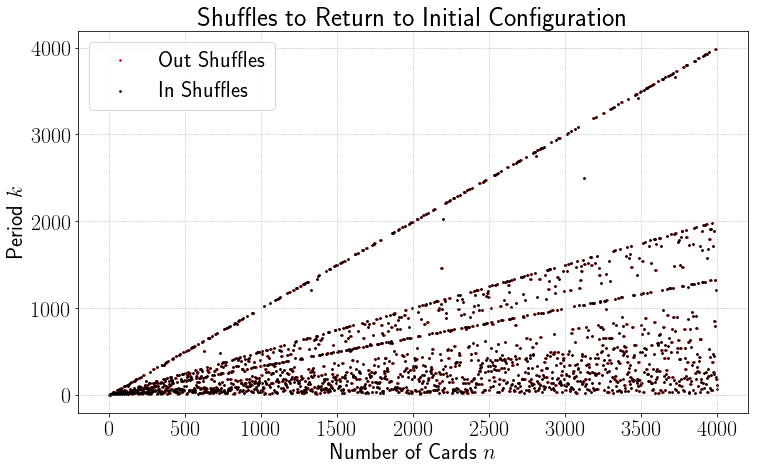

In [23]:
plt.scatter(sizes, out_periods, marker = '.', label = 'Out Shuffles', c = '#ff0000', s = 10)
plt.scatter(sizes, in_periods, marker = '.', label = 'In Shuffles', c = '#000000', s = 10)
plt.xlabel('Number of Cards $n$')
plt.ylabel('Period $k$')
plt.title('Shuffles to Return to Initial Configuration')
plt.legend()
plt.grid()
plt.tight_layout()

Now I am not sure what you expected, but this sure as hell was not what I was expecting. In fact, I think it is probably much more interesting than what I was expecting.

If our end goal is to better understand the function $ k(n) $, then we might conjecture right off the bat that $ k(n) \leq n $ for all $n\in\mathbb{N}$. While it does look this to be true, we have only gone up to $4000$, and there are quite a few many numbers after that to break our conjecture.

The first thing to note is that regardless of the shuffle, we seem to be getting the same pattern. In fact below we can see they are simply a shift away from one another, so we can cut it out with the out shuffles `:^)`.

In [29]:
print(sizes[:20])
print(in_periods[:20])
print(out_periods[:20])

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40]
[2, 4, 3, 6, 10, 12, 4, 8, 18, 6, 11, 20, 18, 28, 5, 10, 12, 36, 12, 20]
[1, 2, 4, 3, 6, 10, 12, 4, 8, 18, 6, 11, 20, 18, 28, 5, 10, 12, 36, 12]


Our first mystery has been solved, and now we can stop worrying about what kind of shuffle we do.

Before anything else happens, lets check the great <a href = 'https://oeis.org/'>Online Encyclopedia of Integer Sequences</a> for this one! Not too surprisingly this is sequence `A002326` which is labelled as "multiplicative order of $2\!\!\mod{2n+1}$" which is quite interesting. In the description you will also find "number of riffle shuffles of $2n+2$ cards required to return a deck to initial state". Now if $n = 0$ i.e. we have 2 cards, then the number of shuffles is either 1, if we do out shuffles, or 2 if we do in shuffles. Since the first term in `A002326` is 1, we know they keep track of things via out shuffles.

Another thing to note here is that _they_ said $2n + 2$ cards. So when we say we have $n$ cards, they care not about the total number of cards, but rather $m = \frac{n - 2}{2}$ which gives $n = 2m + 2$. It really isn't that important, but moving forward plot will look like they doubled. You know I prefer the total number of cards as the measure, but if we do it _their_ way, then at least we can use all natural numbers and not just the evens.

If we keep scrolling further, you will find some code (in various languages) to generate this sequence. Lucky for us, there is a python snippet which, now that it _seems_ $k(n) \leq n$, runs in $O(n)$, whereas our code runs in $O(n^2)$, which is considerably slower. Actually to generate the above data took nearly ~15 minutes. Hence, we decided to run the posted python snippet (below) on a considerably larger input (only half a million, but)

In [ ]:
def A002326(n):
    a = 1
    m = 0
    while True:
        a *= 2
        a %= (2*n + 1)
        m += 1
        if a <= 1:
            break
    return m

I won't bother running any data with this here because I already have elsewhere. I actually let this function run for something like ~8 hours to gather half a million data points. So yeah, we got a decent size data set.

Let's load it in. *Note to self* don't format data files as (`int`, `int`)...

In [8]:
sizes = []
pers = []
with open('card_data.txt', 'r') as f:
    for line in f:
        first, second = line.split(',')
        first = int(first.strip('('))
        second = int(second.strip(')\n'))
        sizes.append(first)
        pers.append(second)

Lets see what all this data looks like!

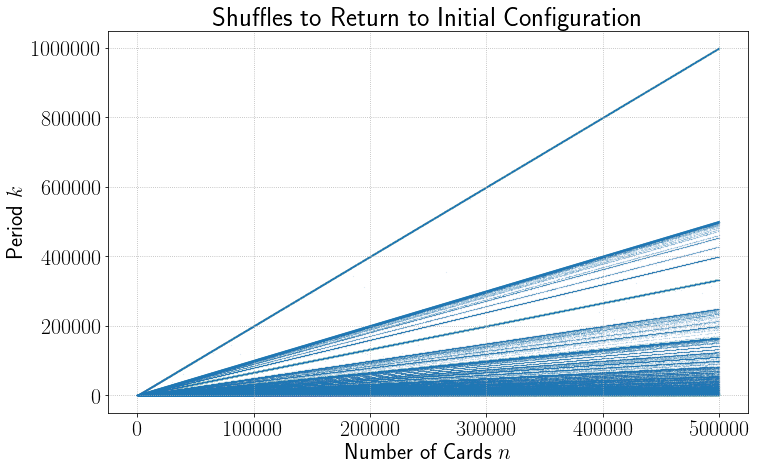

In [32]:
plt.scatter(sizes, pers, marker = '.', s = 0.01)
plt.plot(sizes, np.array(sizes))
plt.xlabel('Number of Cards $n$')
plt.ylabel('Period $k$')
plt.title('Shuffles to Return to Initial Configuration')
plt.grid()
plt.tight_layout()
# plt.savefig('./shuffles.pdf')

Now lets start trying to break this down and understand some of the lines.

In [23]:
identity = [i for i, n in enumerate(pers) if i == n]

In [25]:
doubles = [i for i, n in enumerate(pers) if 2*i == n]

In [33]:
weird = [i for i, n in enumerate(pers) if i < n < 2*i]

In [37]:
two_thirds = [i for i, n in enumerate(pers) if 2*i/3 == n]

In [43]:
print([pers[i] for i in doubles[:20]])

[2, 4, 10, 12, 18, 28, 36, 52, 58, 60, 66, 82, 100, 106, 130, 138, 148, 162, 172, 178]


In [262]:
weird = [i for i, n in enumerate(periods) if i < n < 2*i]
print(weird)

[4, 12, 13, 40, 60, 62, 84, 121, 180, 312, 364, 420]


In [264]:
periods[420]

812

In [268]:
len(sizes)

3999

Thus, if we have two stacks `[0,1,0]` and `[1,0,1]` we should have the following output if we pass them into one and two respectively.

`stack 1    stack 2
0          1
1          0
0          1`

In [3]:
print_stack([1,1,1,1,0,0,0,0,1,0,1,0])

red
blue
red
blue
red
red
red
red
blue
blue
blue
blue


The next function we will build will iterate through one step of the shuffling process. This function is made separate since this is where a bulk of the computation will occur.

In [190]:
def one_step(left, right):
    """
    given chip configuration left and right, will return
    configuration once the two stacks are riffle shuffled
    together and restacked to form two stacks. this is done
    by alternating between left and right, picking chips
    and placing them in the correct new stack. runs in O(n)
    where n is the size of the stack
    """
    stop = len(left)
    if stop != len(right):
        raise ValueError('stacks must be of same size')
    new_left = []
    new_right = []
    i = 0
    lc = 0
    rc = 0
    while i < 2*stop: # O(2*n) = O(n)
        if i % 2 == 0:
            if i < stop:
                new_left.append(right[rc])
                rc += 1
            else:
                new_right.append(right[rc])
                rc += 1
        else:
            if i < stop:
                new_left.append(left[lc])
                lc += 1
            else:
                new_right.append(left[lc])
                lc += 1
        i += 1
    return new_left, new_right

To make sure this function does what we want, lets run a few test cases.

In [290]:
nl, nr = one_step([0,0,0], [1,1,1])
print_stacks(nl, nr)

stack 1  	 stack 2
1		 0
0		 1
1		 0


In [291]:
nl, nr = one_step([0,0], [1,1])
print_stacks(nl, nr)

stack 1  	 stack 2
0		 0
1		 1


Of course we could run more, but i'll leave that for you :^).

We can now write the function that will take in the number of chips we wish to start with, build the initial conditions, and iterate until we are back at where we started. Note that while the `print_stack` calls are commented out, they run because we only comment them out later.

In [307]:
def evolve_stack(size):
    '''given a number of chips (size), computes the number
    of iterations needed to return to configuration of all
    0's on one side, and all 1's on the other. runs in 
    O(n^2) where n is the size of the stack'''
    left_start = [0 for _ in range(size)]  # O(size)
    right_start = [1 for _ in range(size)] # O(size)
#     print_stacks(left_start, right_start)
    ls = left_start
    rs = right_start
    for period in range(10*size): # O(size)
        ls, rs = one_step(ls, rs) # O(size)
#         print_stacks(ls, rs)
        if ls == left_start and rs == right_start:
            return period + 1
    return -1

Now we can run some base cases that we have done by hand. This is not hard, but maybe rather tedious.

In [306]:
periods = []
for i in range(1, 5):
    print('-------------------')
    print('STARTING WITH N = {0}'.format(i))
    print('-------------------')
    periods.append(evolve_stack(i))
    print('')
print(periods)

-------------------
STARTING WITH N = 1
-------------------
stack 1  	 stack 2
0		 1
stack 1  	 stack 2
1		 0
stack 1  	 stack 2
0		 1

-------------------
STARTING WITH N = 2
-------------------
stack 1  	 stack 2
0		 1
0		 1
stack 1  	 stack 2
0		 0
1		 1
stack 1  	 stack 2
1		 0
1		 0
stack 1  	 stack 2
1		 1
0		 0
stack 1  	 stack 2
0		 1
0		 1

-------------------
STARTING WITH N = 3
-------------------
stack 1  	 stack 2
0		 1
0		 1
0		 1
stack 1  	 stack 2
1		 0
0		 1
1		 0
stack 1  	 stack 2
1		 1
1		 0
0		 0
stack 1  	 stack 2
0		 1
0		 1
0		 1

-------------------
STARTING WITH N = 4
-------------------
stack 1  	 stack 2
0		 1
0		 1
0		 1
0		 1
stack 1  	 stack 2
0		 0
1		 1
0		 0
1		 1
stack 1  	 stack 2
0		 0
0		 0
1		 1
1		 1
stack 1  	 stack 2
1		 0
1		 0
1		 0
1		 0
stack 1  	 stack 2
1		 1
0		 0
1		 1
0		 0
stack 1  	 stack 2
1		 1
1		 1
0		 0
0		 0
stack 1  	 stack 2
0		 1
0		 1
0		 1
0		 1

[2, 4, 3, 6]


If this is at all confusing, remember that this riffle shuffle is such that the chip on the bottom right stays put, and the chip on the bottom left slides over it. Once the shuffle is complete, the top $\frac{N}{2}$ chips are removed, and moved to the right.

Now that we have this working, we can run `evolve_stack` on a much larger data set to obtain much more data. Since we are confident in the workings of this this function, the printing functions are commented out so we don't have to deal with so much output.

In [270]:
x = list(range(2000))
per = [evolve_stack(i) for i in x]

Before we go ahead and play with all this data, lets go ahead and take a look at it to see if we find anything interesting.

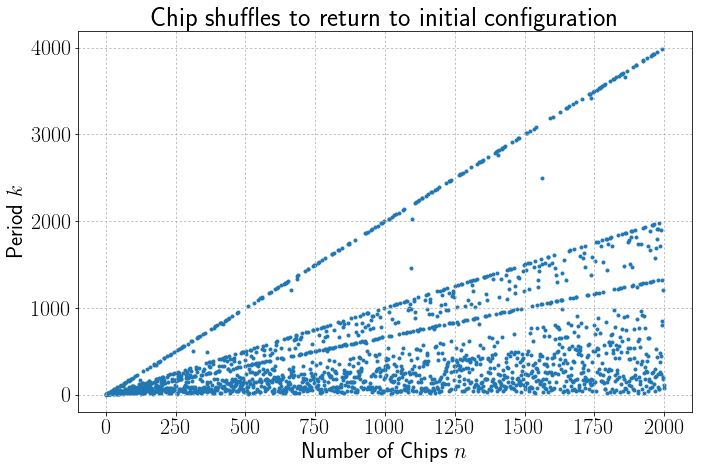

In [350]:
plt.scatter(x, per, marker='.')
plt.xlabel('Number of Chips $n$')
plt.ylabel('Period $k$')
plt.title('Chip shuffles to return to initial configuration')
# plt.plot(x, (2/3)*np.array(x), color = 'r')
# plt.ylim([30,50])
# plt.scatter(np.linspace(1,2000,100), np.log(np.linspace(1,2000,100)), marker='.')
plt.grid();

Now I'm not sure what I expected to see after running this, but it surely wasn't this. There is clearly some exciting mathematics to be had here.

There are many clear patterns, but right off the bat we can conjecture that $k(n)\leq 2n$ for all $n\in\mathbb{N}$.

In [326]:
two_pow = [2**i for i in range(11)]
two_pow_dat = [evolve_stack(i) for i in two_pow]

In [327]:
print(two_pow_dat)

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]


In [352]:
weird = {}
for i in range(len(per)):
    if i < per[i] < 2*i:
        weird[i] = per[i]

In [353]:
print([weird[i] for i in weird])

[6, 20, 18, 54, 110, 100, 156, 162, 342, 500, 486, 812, 1210, 1332, 1458, 2028, 2756, 2500, 3422, 3660]


In [368]:
doubles = []
for i in range(len(per)):
    if per[i] == 2*i:
        print(per[i])
        doubles.append(i)

0
2
4
10
12
18
28
36
52
58
60
66
82
100
106
130
138
148
162
172
178
180
196
210
226
268
292
316
346
348
372
378
388
418
420
442
460
466
490
508
522
540
546
556
562
586
612
618
652
658
660
676
700
708
756
772
786
796
820
826
828
852
858
876
882
906
940
946
1018
1060
1090
1108
1116
1122
1170
1186
1212
1228
1236
1258
1276
1282
1290
1300
1306
1372
1380
1426
1450
1452
1482
1492
1498
1522
1530
1548
1570
1618
1620
1636
1666
1668
1692
1732
1740
1746
1786
1860
1866
1876
1900
1906
1930
1948
1972
1978
1986
1996
2026
2028
2052
2068
2082
2098
2130
2140
2212
2220
2236
2242
2266
2268
2292
2308
2332
2338
2356
2370
2388
2436
2458
2466
2476
2530
2538
2548
2556
2578
2620
2658
2676
2682
2692
2698
2706
2740
2788
2796
2802
2818
2836
2842
2850
2860
2908
2938
2956
2962
3010
3018
3036
3066
3082
3186
3202
3252
3298
3306
3322
3346
3370
3412
3460
3466
3468
3490
3498
3516
3532
3538
3546
3556
3570
3580
3612
3636
3642
3658
3676
3690
3700
3708
3732
3778
3796
3802
3850
3852
3876
3906
3916
3922
3930
3946
3988


In [355]:
print(doubles)

[0, 1, 2, 5, 6, 9, 14, 18, 26, 29, 30, 33, 41, 50, 53, 65, 69, 74, 81, 86, 89, 90, 98, 105, 113, 134, 146, 158, 173, 174, 186, 189, 194, 209, 210, 221, 230, 233, 245, 254, 261, 270, 273, 278, 281, 293, 306, 309, 326, 329, 330, 338, 350, 354, 378, 386, 393, 398, 410, 413, 414, 426, 429, 438, 441, 453, 470, 473, 509, 530, 545, 554, 558, 561, 585, 593, 606, 614, 618, 629, 638, 641, 645, 650, 653, 686, 690, 713, 725, 726, 741, 746, 749, 761, 765, 774, 785, 809, 810, 818, 833, 834, 846, 866, 870, 873, 893, 930, 933, 938, 950, 953, 965, 974, 986, 989, 993, 998, 1013, 1014, 1026, 1034, 1041, 1049, 1065, 1070, 1106, 1110, 1118, 1121, 1133, 1134, 1146, 1154, 1166, 1169, 1178, 1185, 1194, 1218, 1229, 1233, 1238, 1265, 1269, 1274, 1278, 1289, 1310, 1329, 1338, 1341, 1346, 1349, 1353, 1370, 1394, 1398, 1401, 1409, 1418, 1421, 1425, 1430, 1454, 1469, 1478, 1481, 1505, 1509, 1518, 1533, 1541, 1593, 1601, 1626, 1649, 1653, 1661, 1673, 1685, 1706, 1730, 1733, 1734, 1745, 1749, 1758, 1766, 1769, 1773, 

In [367]:
identity = []
for i in range(len(per)):
    if per[i] == i:
        identity.append(i)

In [362]:
print(identity)

[0, 3, 8, 11, 20, 23, 35, 39, 48, 51, 68, 83, 95, 96, 99, 119, 131, 135, 155, 156, 179, 183, 191, 200, 204, 224, 231, 239, 243, 251, 260, 284, 299, 303, 323, 359, 371, 375, 380, 384, 404, 411, 419, 428, 431, 443, 464, 483, 488, 491, 495, 504, 515, 519, 531, 543, 564, 575, 611, 615, 639, 648, 651, 659, 680, 683, 704, 719, 723, 743, 744, 755, 771, 779, 783, 791, 803, 831, 848, 879, 891, 911, 923, 935, 936, 939, 975, 996, 1019, 1031, 1040, 1043, 1055, 1068, 1076, 1080, 1103, 1119, 1148, 1155, 1188, 1199, 1208, 1211, 1223, 1251, 1260, 1271, 1275, 1295, 1304, 1308, 1316, 1323, 1331, 1355, 1356, 1359, 1364, 1376, 1388, 1400, 1439, 1443, 1448, 1451, 1463, 1499, 1500, 1511, 1520, 1539, 1559, 1583, 1584, 1604, 1659, 1664, 1679, 1703, 1716, 1755, 1763, 1779, 1791, 1796, 1808, 1811, 1835, 1848, 1859, 1863, 1883, 1884, 1896, 1923, 1931, 1955, 1959, 1964, 1983]


In [363]:
twothirds = []
for i in range(len(per)):
    if per[i] == 2*i/3:
        twothirds.append(i)

In [364]:
print(twothirds)

[0, 21, 54, 78, 114, 138, 141, 153, 249, 321, 345, 366, 369, 405, 498, 510, 525, 534, 546, 729, 789, 798, 813, 849, 861, 894, 966, 1089, 1101, 1125, 1170, 1173, 1374, 1458, 1581, 1590, 1614, 1629, 1686]


In [369]:
print(per)

[0, 2, 4, 3, 6, 10, 12, 4, 8, 18, 6, 11, 20, 18, 28, 5, 10, 12, 36, 12, 20, 14, 12, 23, 21, 8, 52, 20, 18, 58, 60, 6, 12, 66, 22, 35, 9, 20, 30, 39, 54, 82, 8, 28, 11, 12, 10, 36, 48, 30, 100, 51, 12, 106, 36, 36, 28, 44, 12, 24, 110, 20, 100, 7, 14, 130, 18, 36, 68, 138, 46, 60, 28, 42, 148, 15, 24, 20, 52, 52, 33, 162, 20, 83, 156, 18, 172, 60, 58, 178, 180, 60, 36, 40, 18, 95, 96, 12, 196, 99, 66, 84, 20, 66, 90, 210, 70, 28, 15, 18, 24, 37, 60, 226, 76, 30, 29, 92, 78, 119, 24, 162, 84, 36, 82, 50, 110, 8, 16, 36, 84, 131, 52, 22, 268, 135, 12, 20, 92, 30, 70, 94, 36, 60, 136, 48, 292, 116, 90, 132, 42, 100, 60, 102, 102, 155, 156, 12, 316, 140, 106, 72, 60, 36, 69, 30, 36, 132, 21, 28, 10, 147, 44, 346, 348, 36, 88, 140, 24, 179, 342, 110, 36, 183, 60, 156, 372, 100, 84, 378, 14, 191, 60, 42, 388, 88, 130, 156, 44, 18, 200, 60, 108, 180, 204, 68, 174, 164, 138, 418, 420, 138, 40, 60, 60, 43, 72, 28, 198, 73, 42, 442, 44, 148, 224, 20, 30, 12, 76, 72, 460, 231, 20, 466, 66, 52, 70,

In [22]:
%load_ext heat

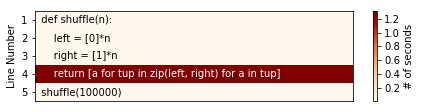

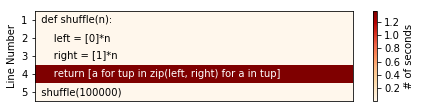

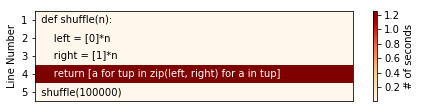

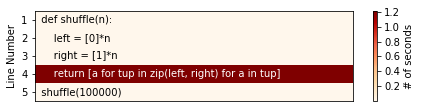

1 loop, best of 3: 1.35 s per loop


In [42]:
%%timeit
%%heat
def shuffle(n):
    left = [0]*n
    right = [1]*n
    return [a for tup in zip(left, right) for a in tup]
shuffle(100000)

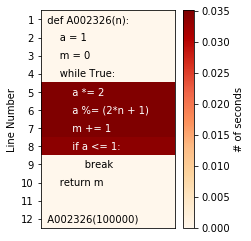

CPU times: user 306 ms, sys: 6.31 ms, total: 312 ms
Wall time: 322 ms


In [40]:
%%time
%%heat
def A002326(n):
    a = 1
    m = 0
    while True:
        a *= 2
        a %= (2*n + 1)
        m += 1
        if a <= 1:
            break
    return m

A002326(100000)

In [79]:
def n_riffle(left, right, n):
    if len(left) % n != 0:
        raise ValueError('{0} must divide {1}'.format(n, len(left)))
#     left = [(0,)*n]*(num_cards // n)
#     right = [(1,)*n]*(num_cards // n)
    return [a for tup in zip(left,right) for a in tup]

In [96]:
def evolve_double(max_cards):
    periods = []
    for n in range(2,max_cards):
        starting = [(0,)*2]*(n // 2) + [(1,)*2]*(n // 2)
        n *= 2
        current = n_riffle(
            [(0,)*2]*(n // 2),
            [(1,)*2]*(n // 2), 2)
        period = 1
        while current != starting:
            left = current[:len(current) // 2]
            right = current[len(current) // 2:]
            print('NEW')
            print(left,right)
#             print(right)
            current = n_riffle(left, right, 2)
            period += 1
            if period > 1000000:
                return periods
        periods.append(period)
    return periods

In [97]:
l = evolve_double(10)

NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0),

[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1,

[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1,

[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0,

NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0),

[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1,

[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0,

NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0),

[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0, 0)] [(1, 1), (1, 1)]
NEW
[(0, 0), (1, 1)] [(0, 0), (1, 1)]
NEW
[(0, 0), (0,

KeyboardInterrupt: 

In [93]:
l

[]